In [13]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import numpy as np

from linearmodels.panel import PanelOLS
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

# Characteristics Random Forest



In [14]:
#decide which df to use
df = pd.read_csv("Dataframes/economic_story_dataframe.csv")
#df = df.loc[:, ["Instrument", "Date", "Earnings Per Share - Actual Surprise", "Revenue - Actual", "Net Income after Tax"]]

df

,Instrument,Date,GICS Industry Group Name,Earnings Per Share - Actual,Earnings Per Share - Mean,Earnings Per Share - Actual Surprise,Earnings Per Share – Coefficient of Variation,Market Capitalization,Revenue - Actual,Enterprise Value,...,Recommendation - Mean (1-5).1,"WACC Inflation Adjusted Risk Free Rate, (%)",Net Income after Tax,Price Target - Mean,Price Target - Standard Deviation,Price Close,Enterprise Value To Sales (Daily Time Series Ratio),3 Month Total Return,Volume,Unemployment rate
0,AVY.N,2013-01-01,Materials,0.54,0.48571,11.178,3.625620,3.426001e+09,1.532200e+09,4.413001e+09,...,3.000,NaN,33400000.0,36.00000,2.44949,34.92,0.799347,10.637479,207295.0,8.0
1,AVY.N,2013-04-01,Materials,0.59,0.57571,2.482,2.046169,4.309428e+09,1.498900e+09,5.459128e+09,...,3.000,NaN,66800000.0,42.57143,3.92272,43.07,0.895787,24.148726,0.0,7.6
2,AVY.N,2013-07-01,Materials,0.71,0.70250,1.068,1.551601,4.258229e+09,1.552300e+09,5.436229e+09,...,2.875,NaN,70800000.0,45.00000,4.30946,42.76,0.906078,-0.054218,0.0,7.3
3,AVY.N,2013-10-01,Materials,0.69,0.63833,8.095,2.775994,4.273414e+09,1.504900e+09,5.029514e+09,...,2.875,NaN,62000000.0,47.71429,3.45230,43.52,0.903176,2.467620,236291.0,7.2
4,AVY.N,2014-01-01,Materials,0.69,0.68000,1.471,3.204412,4.877168e+09,1.583900e+09,5.553068e+09,...,2.625,NaN,42100000.0,54.62500,3.42555,50.19,0.920659,16.003852,157761.0,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20115,POOL.OQ,2021-10-01,Retailing,4.51,3.84833,17.194,2.836295,1.742020e+10,1.411448e+09,1.769954e+10,...,2.300,1.527139,184573000.0,545.28571,50.48823,434.41,3.684400,-5.130322,157740.0,4.5
20116,POOL.OQ,2022-01-01,Retailing,2.63,1.87500,40.267,3.269867,2.268979e+10,1.035557e+09,2.384882e+10,...,2.300,1.515266,107542000.0,571.00000,41.33833,566.00,4.504382,30.489705,82349.0,4.0
20117,POOL.OQ,2022-04-01,Retailing,4.23,3.14867,34.342,6.630736,1.696712e+10,1.412650e+09,1.843682e+10,...,2.300,2.325202,179203000.0,519.88889,37.49206,422.85,3.422880,-25.160664,290897.0,3.6
20118,POOL.OQ,2022-07-01,Retailing,7.63,7.51700,1.503,3.625249,1.405795e+10,2.055818e+09,1.556187e+10,...,2.000,3.092855,307205000.0,435.37500,57.57373,351.23,2.749481,-21.661570,185584.0,3.5


#### OLS Regression

In [15]:
#identifying outliers and replacing them with NA
summary_stats = df["Earnings Per Share - Actual Surprise"].describe()
Q1 = summary_stats.loc['25%']
Q3 = summary_stats.loc['75%']
IQR = Q3 - Q1
threshold = 7 #1.5 is standard threshold but we still want to keep enough variation in the data so setting threshol higher here
surprise_outliers_removed = df["Earnings Per Share - Actual Surprise"].loc[~((df["Earnings Per Share - Actual Surprise"] < (Q1 - threshold * IQR)) | (df["Earnings Per Share - Actual Surprise"] > (Q3 + threshold * IQR)))]
df_accuracy_new = df.copy()
df_accuracy_new["Earnings Per Share - Actual Surprise"] = surprise_outliers_removed
df_accuracy_new = df_accuracy_new.dropna(subset=["Earnings Per Share - Actual Surprise"])
#df_accuracy_new["Recommendation - Mean (1-5)"] = df_accuracy_new["Recommendation - Mean (1-5)"].fillna(0)
#df_accuracy_new = df_accuracy_new.dropna()


In [16]:
df_accuracy_new

,Instrument,Date,GICS Industry Group Name,Earnings Per Share - Actual,Earnings Per Share - Mean,Earnings Per Share - Actual Surprise,Earnings Per Share – Coefficient of Variation,Market Capitalization,Revenue - Actual,Enterprise Value,...,Recommendation - Mean (1-5).1,"WACC Inflation Adjusted Risk Free Rate, (%)",Net Income after Tax,Price Target - Mean,Price Target - Standard Deviation,Price Close,Enterprise Value To Sales (Daily Time Series Ratio),3 Month Total Return,Volume,Unemployment rate
0,AVY.N,2013-01-01,Materials,0.54,0.48571,11.178,3.625620,3.426001e+09,1.532200e+09,4.413001e+09,...,3.000,NaN,33400000.0,36.00000,2.44949,34.92,0.799347,10.637479,207295.0,8.0
1,AVY.N,2013-04-01,Materials,0.59,0.57571,2.482,2.046169,4.309428e+09,1.498900e+09,5.459128e+09,...,3.000,NaN,66800000.0,42.57143,3.92272,43.07,0.895787,24.148726,0.0,7.6
2,AVY.N,2013-07-01,Materials,0.71,0.70250,1.068,1.551601,4.258229e+09,1.552300e+09,5.436229e+09,...,2.875,NaN,70800000.0,45.00000,4.30946,42.76,0.906078,-0.054218,0.0,7.3
3,AVY.N,2013-10-01,Materials,0.69,0.63833,8.095,2.775994,4.273414e+09,1.504900e+09,5.029514e+09,...,2.875,NaN,62000000.0,47.71429,3.45230,43.52,0.903176,2.467620,236291.0,7.2
4,AVY.N,2014-01-01,Materials,0.69,0.68000,1.471,3.204412,4.877168e+09,1.583900e+09,5.553068e+09,...,2.625,NaN,42100000.0,54.62500,3.42555,50.19,0.920659,16.003852,157761.0,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20115,POOL.OQ,2021-10-01,Retailing,4.51,3.84833,17.194,2.836295,1.742020e+10,1.411448e+09,1.769954e+10,...,2.300,1.527139,184573000.0,545.28571,50.48823,434.41,3.684400,-5.130322,157740.0,4.5
20116,POOL.OQ,2022-01-01,Retailing,2.63,1.87500,40.267,3.269867,2.268979e+10,1.035557e+09,2.384882e+10,...,2.300,1.515266,107542000.0,571.00000,41.33833,566.00,4.504382,30.489705,82349.0,4.0
20117,POOL.OQ,2022-04-01,Retailing,4.23,3.14867,34.342,6.630736,1.696712e+10,1.412650e+09,1.843682e+10,...,2.300,2.325202,179203000.0,519.88889,37.49206,422.85,3.422880,-25.160664,290897.0,3.6
20118,POOL.OQ,2022-07-01,Retailing,7.63,7.51700,1.503,3.625249,1.405795e+10,2.055818e+09,1.556187e+10,...,2.000,3.092855,307205000.0,435.37500,57.57373,351.23,2.749481,-21.661570,185584.0,3.5


C:\Users\alexa\AppData\Local\Temp\ipykernel_20916\2974366429.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_accuracy_new.corr()


<AxesSubplot: >

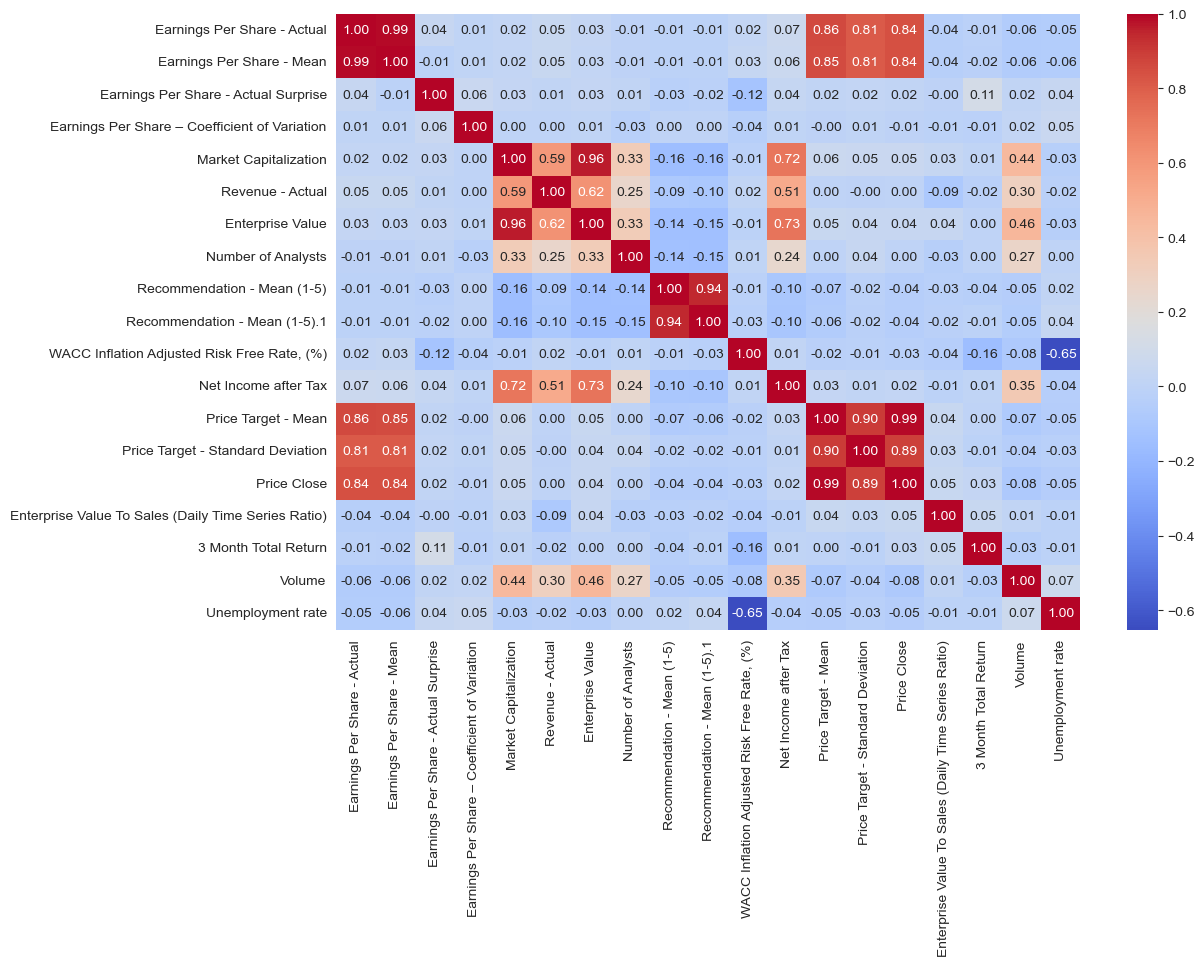

In [17]:
corr_matrix = df_accuracy_new.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

In [24]:
#for_rf = df_accuracy_new.iloc[:25,:]
for_rf = df_accuracy_new[df_accuracy_new['Instrument'] == 'AAPL.OQ']
#.iloc[0:38, :]


# print the reversed DataFrame
for_rf

,Instrument,Date,GICS Industry Group Name,Earnings Per Share - Actual,Earnings Per Share - Mean,Earnings Per Share - Actual Surprise,Earnings Per Share – Coefficient of Variation,Market Capitalization,Revenue - Actual,Enterprise Value,...,"WACC Inflation Adjusted Risk Free Rate, (%)",Net Income after Tax,Price Target - Mean,Price Target - Standard Deviation,Price Close,Enterprise Value To Sales (Daily Time Series Ratio),3 Month Total Return,Volume,Unemployment rate_x,Unemployment rate_y
10600,AAPL.OQ,2013-01-01,Technology Hardware & Equipment,0.49321,0.48109,2.520,5.811802,4.793665e+11,5.451200e+10,4.395465e+11,...,NaN,1.307800e+10,25.38895,4.54189,19.036767,3.006664,-19.737215,121906437.0,8.0,8.0
10601,AAPL.OQ,2013-04-01,Technology Hardware & Equipment,0.36036,0.35721,0.881,4.599535,4.156834e+11,4.360300e+10,3.765464e+11,...,NaN,9.547000e+09,20.91715,3.65908,15.808198,2.282290,-16.489690,0.0,7.6,7.6
10602,AAPL.OQ,2013-07-01,Technology Hardware & Equipment,0.26679,0.26143,2.049,4.054623,3.722025e+11,3.532300e+10,3.465545e+11,...,NaN,6.900000e+09,19.24070,3.39846,14.145700,1.969590,-9.919175,0.0,7.3,7.3
10603,AAPL.OQ,2013-10-01,Technology Hardware & Equipment,0.29500,0.28414,3.822,2.301682,4.385769e+11,3.747200e+10,4.149909e+11,...,NaN,7.512000e+09,19.92491,2.66156,17.026769,2.405362,21.163436,72711424.0,7.2,7.2
10604,AAPL.OQ,2014-01-01,Technology Hardware & Equipment,0.51786,0.50238,3.081,2.257255,5.039343e+11,5.759400e+10,4.801843e+11,...,NaN,1.307200e+10,21.29346,2.85787,20.039623,2.791847,18.383994,63846167.0,6.6,6.6
10605,AAPL.OQ,2014-04-01,Technology Hardware & Equipment,0.41500,0.36407,13.989,1.996869,4.788732e+11,4.564600e+10,4.544852e+11,...,NaN,1.022300e+10,21.27050,2.73699,19.169267,2.521857,-3.773913,47069979.0,6.2,6.2
10606,AAPL.OQ,2014-07-01,Technology Hardware & Equipment,0.32000,0.30776,3.978,3.499480,5.508839e+11,3.743200e+10,5.441189e+11,...,NaN,7.748000e+09,25.28959,3.71550,23.232500,3.023181,21.847348,43372516.0,6.2,6.2
10607,AAPL.OQ,2014-10-01,Technology Hardware & Equipment,0.35500,0.32628,8.802,3.763639,6.032776e+11,4.212300e+10,6.134956e+11,...,NaN,8.467000e+09,28.13372,2.79397,25.187500,3.279654,8.954257,55882288.0,5.7,5.7
10608,AAPL.OQ,2015-01-01,Technology Hardware & Equipment,0.76500,0.65047,17.607,4.466002,6.685331e+11,7.459900e+10,6.724731e+11,...,NaN,1.802400e+10,31.09884,3.57850,27.595000,3.597358,10.032024,46282028.0,5.7,5.7
10609,AAPL.OQ,2015-04-01,Technology Hardware & Equipment,0.58250,0.53968,7.935,4.304403,7.179002e+11,5.801000e+10,7.286752e+11,...,NaN,1.356900e+10,35.86586,4.04363,31.107500,3.647214,13.170497,49290460.0,5.4,5.4


In [25]:
corr_matrix = for_rf.groupby('Instrument').corr()

C:\Users\alexa\AppData\Local\Temp\ipykernel_9376\3194885904.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corr_matrix = for_rf.groupby('Instrument').corr()


<AxesSubplot: ylabel='Instrument-None'>

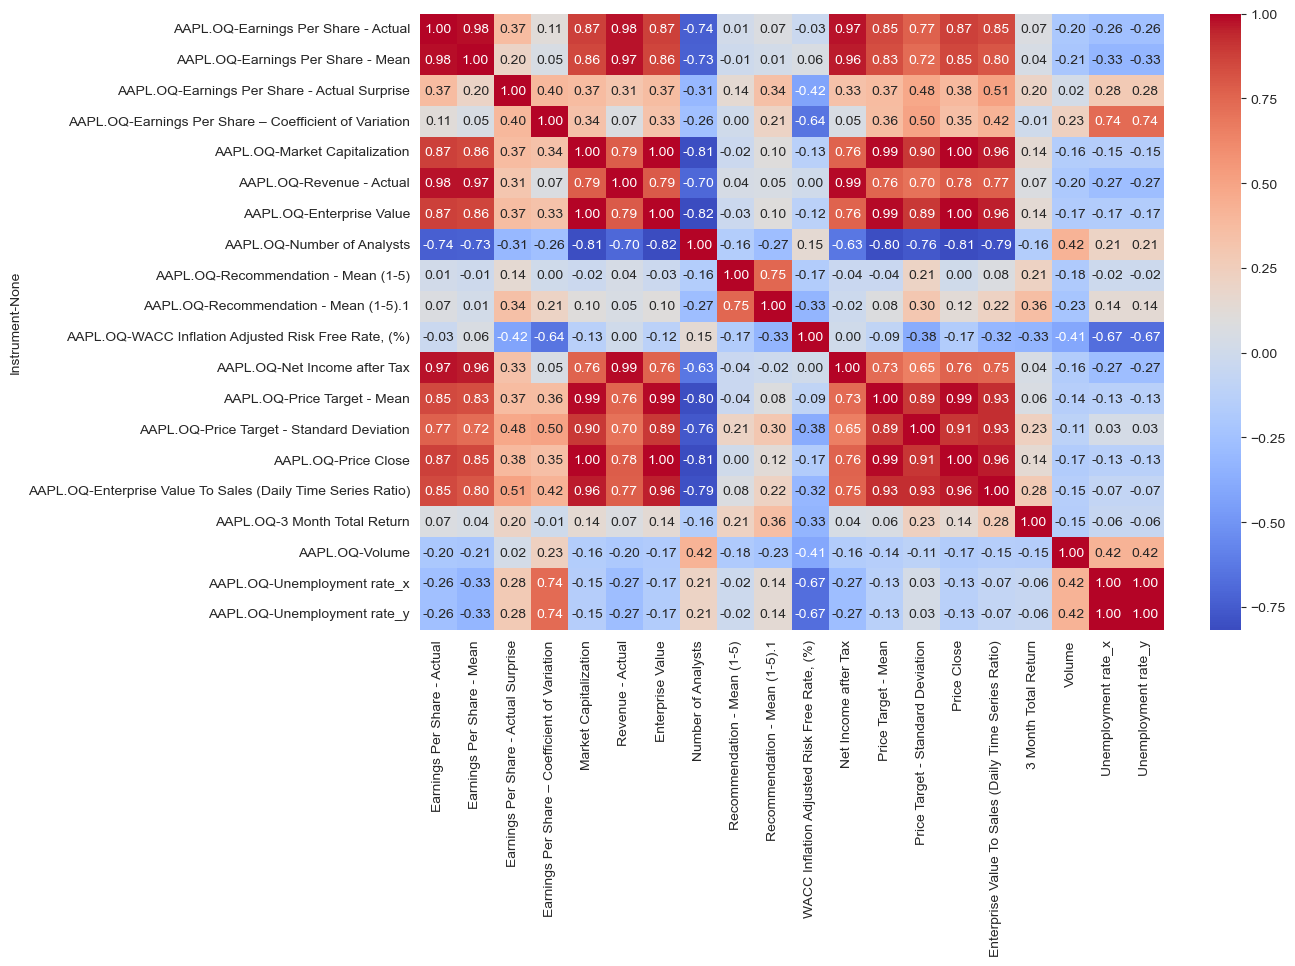

In [26]:
# plot a heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

In [7]:
#decide which df to use
df = pd.read_csv("Dataframes/analysts.csv")
#df = df.loc[:, ["Instrument", "Date", "Earnings Per Share - Actual Surprise", "Revenue - Actual", "Net Income after Tax"]]

df

,Instrument,Date,GICS Industry Group Name,Earnings Per Share - Actual Surprise,Earnings Per Share – Coefficient of Variation,Recommendation change,Number of Analysts,Recommendation - Mean (1-5),Price Target - Mean,Price Target - Standard Deviation
0,AVY.N,2013-01-01,Materials,11.178,3.625620,0.00000,7.0,3.00000,36.00000,2.44949
1,AVY.N,2013-04-01,Materials,2.482,2.046169,-0.12500,7.0,2.87500,42.57143,3.92272
2,AVY.N,2013-07-01,Materials,1.068,1.551601,0.00000,8.0,2.87500,45.00000,4.30946
3,AVY.N,2013-10-01,Materials,8.095,2.775994,-0.25000,7.0,2.62500,47.71429,3.45230
4,AVY.N,2014-01-01,Materials,1.471,3.204412,-0.29167,8.0,2.33333,54.62500,3.42555
...,...,...,...,...,...,...,...,...,...,...
20115,POOL.OQ,2021-10-01,Retailing,17.194,2.836295,0.00000,8.0,2.30000,545.28571,50.48823
20116,POOL.OQ,2022-01-01,Retailing,40.267,3.269867,0.00000,8.0,2.30000,571.00000,41.33833
20117,POOL.OQ,2022-04-01,Retailing,34.342,6.630736,-0.30000,9.0,2.00000,519.88889,37.49206
20118,POOL.OQ,2022-07-01,Retailing,1.503,3.625249,0.20000,9.0,2.20000,435.37500,57.57373


In [8]:
#identifying outliers and replacing them with NA
summary_stats = df["Earnings Per Share - Actual Surprise"].describe()
Q1 = summary_stats.loc['25%']
Q3 = summary_stats.loc['75%']
IQR = Q3 - Q1
threshold = 7 #1.5 is standard threshold but we still want to keep enough variation in the data so setting threshol higher here
surprise_outliers_removed = df["Earnings Per Share - Actual Surprise"].loc[~((df["Earnings Per Share - Actual Surprise"] < (Q1 - threshold * IQR)) | (df["Earnings Per Share - Actual Surprise"] > (Q3 + threshold * IQR)))]
df_accuracy_new = df.copy()
df_accuracy_new["Earnings Per Share - Actual Surprise"] = surprise_outliers_removed
df_accuracy_new = df_accuracy_new.dropna(subset=["Earnings Per Share - Actual Surprise"])
#df_accuracy_new["Recommendation - Mean (1-5)"] = df_accuracy_new["Recommendation - Mean (1-5)"].fillna(0)
#df_accuracy_new = df_accuracy_new.dropna()


In [9]:
#for_rf = df_accuracy_new.iloc[:25,:]
for_rf = df_accuracy_new[df_accuracy_new['Instrument'] == 'AAPL.OQ']
#.iloc[0:38, :]


# print the reversed DataFrame
for_rf

,Instrument,Date,GICS Industry Group Name,Earnings Per Share - Actual Surprise,Earnings Per Share – Coefficient of Variation,Recommendation change,Number of Analysts,Recommendation - Mean (1-5),Price Target - Mean,Price Target - Standard Deviation
10600,AAPL.OQ,2013-01-01,Technology Hardware & Equipment,2.520,5.811802,0.07960,49.0,1.84746,25.38895,4.54189
10601,AAPL.OQ,2013-04-01,Technology Hardware & Equipment,0.881,4.599535,0.03185,48.0,1.87931,20.91715,3.65908
10602,AAPL.OQ,2013-07-01,Technology Hardware & Equipment,2.049,4.054623,0.05052,48.0,1.92983,19.24070,3.39846
10603,AAPL.OQ,2013-10-01,Technology Hardware & Equipment,3.822,2.301682,0.03508,47.0,1.96491,19.92491,2.66156
10604,AAPL.OQ,2014-01-01,Technology Hardware & Equipment,3.081,2.257255,-0.00195,47.0,1.96296,21.29346,2.85787
10605,AAPL.OQ,2014-04-01,Technology Hardware & Equipment,13.989,1.996869,0.05490,48.0,2.01786,21.27050,2.73699
10606,AAPL.OQ,2014-07-01,Technology Hardware & Equipment,3.978,3.499480,-0.11045,45.0,1.90741,25.28959,3.71550
10607,AAPL.OQ,2014-10-01,Technology Hardware & Equipment,8.802,3.763639,-0.02279,43.0,1.88462,28.13372,2.79397
10608,AAPL.OQ,2015-01-01,Technology Hardware & Equipment,17.607,4.466002,0.00000,43.0,1.88462,31.09884,3.57850
10609,AAPL.OQ,2015-04-01,Technology Hardware & Equipment,7.935,4.304403,0.05538,42.0,1.94000,35.86586,4.04363


In [10]:
corr_matrix = for_rf.groupby('Instrument').corr()

C:\Users\alexa\AppData\Local\Temp\ipykernel_20916\3194885904.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corr_matrix = for_rf.groupby('Instrument').corr()


<AxesSubplot: ylabel='Instrument-None'>

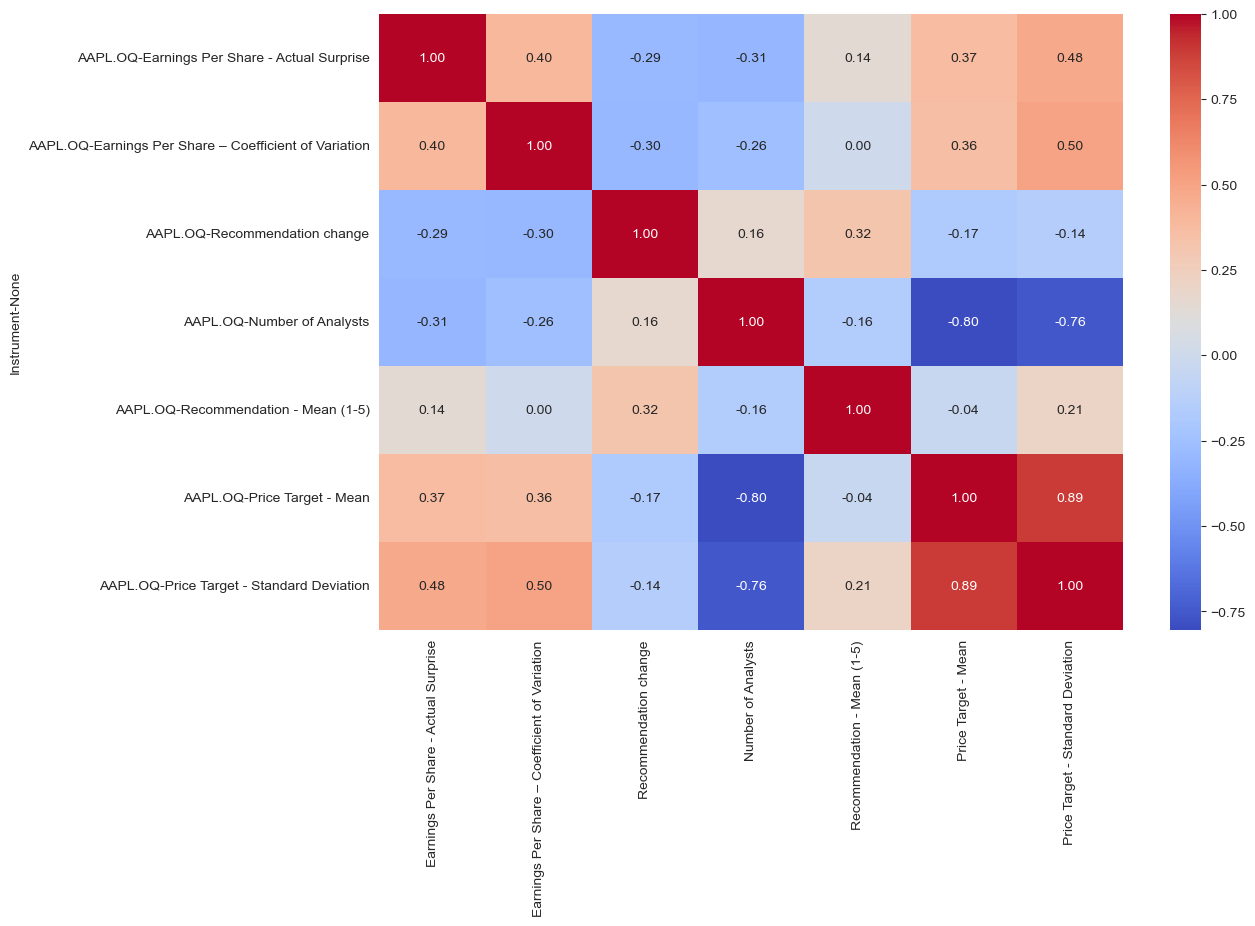

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot a heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')